# K-means clustering

In this section you will create clusters based on book ratings using K-means operations. 

Are there similarities between books when we plot them in a graph? Are there possible clusters we can derive from this spatial layout? 

To help us cluster our book data, we will be using the sklearn Kmeans and a graph layout function from Ch.7 in our manual. 

In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict

## 1. Load the dataset

In [3]:
df = pd.read_csv('data/BX-Book-Ratings-Subset.csv', sep=';', encoding='latin-1')
df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276727,0446520802,0
2,276744,038550120X,7
3,276746,0425115801,0
4,276746,0449006522,0
...,...,...,...
393949,276704,0446605409,0
393950,276704,0743211383,7
393951,276704,080410526X,0
393952,276706,0679447156,0


## 1. Construct a ratings matrix 

To cluster our data we need to construct a matrix where each row is the ratings from all users for a certain book. In other words, the index of the matrix will be books ISBN and the columns user ratings (i.e., one column per User-ID).

Can you construct such (huge!) matrix with the dataset? (Hint: use the pandas dataframe `pivot` function)

In [17]:
df_test = pd.pivot_table(df, values = "Book-Rating", index = "ISBN", columns = "User-ID")
df_test.head(100)

User-ID,8,9,10,14,16,17,19,26,32,39,...,278831,278832,278836,278838,278843,278844,278846,278849,278851,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
0006493580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000649840X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0006512135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0006513204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0006514855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0060184957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060185074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060185147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#df_test = df_test.iloc[0:50,]

In [30]:
# Check for NaN values
print("Number of NaN values:", df_test.isna().sum().sum())

# Check for non-NaN values
print("Number of non-NaN values:", df_test.notna().sum().sum())

# Verify index and columns
print("Index:", df_test.index)
print("Columns:", df_test.columns)

Number of NaN values: 429367266
Number of non-NaN values: 393954
Index: Index(['0006493580', '000649840X', '0006512135', '0006513204', '0006514855',
       '0006547834', '0006550576', '0006550681', '0006550789', '0007106572',
       ...
       '8817131628', '8826703132', '8845205118', '8845247414', '884590184X',
       '8873122933', '8885989403', '950491036X', '9727722458',
       '9770390107900'],
      dtype='object', name='ISBN', length=7490)
Columns: Index([     8,      9,     10,     14,     16,     17,     19,     26,     32,
           39,
       ...
       278831, 278832, 278836, 278838, 278843, 278844, 278846, 278849, 278851,
       278854],
      dtype='int64', name='User-ID', length=57378)


## 2.  Construct a sparse matrix using scipy.sparse

Now that you have a matrix built from the dataset we need to tranform it into a `scipy.sparse` `csr_matrix` in order to produce our clusters with `sklearn.cluster`

In [12]:
# Drop rows where all values are NaN
df_cleaned_rows = df_test.dropna(axis=0, how='all')

# Drop columns where all values are NaN
df_cleaned = df_cleaned_rows.dropna(axis=1, how='all')

In [42]:
from scipy.sparse import csr_matrix

scipy_matrix = csr_matrix(df_cleaned)



In [43]:
import numpy as np

# Replace NaN values with 0s
scipy_matrix.data[np.isnan(scipy_matrix.data)] = 0




In [44]:
print(scipy_matrix)

  (0, 0)	0.0
  (0, 1)	0.0
  (0, 2)	0.0
  (0, 3)	0.0
  (0, 4)	0.0
  (0, 5)	0.0
  (0, 6)	0.0
  (0, 7)	0.0
  (0, 8)	0.0
  (0, 9)	0.0
  (0, 10)	0.0
  (0, 11)	0.0
  (0, 12)	0.0
  (0, 13)	0.0
  (0, 14)	0.0
  (0, 15)	0.0
  (0, 16)	0.0
  (0, 17)	0.0
  (0, 18)	0.0
  (0, 19)	0.0
  (0, 20)	0.0
  (0, 21)	0.0
  (0, 22)	0.0
  (0, 23)	0.0
  (0, 24)	0.0
  :	:
  (49, 1392)	0.0
  (49, 1393)	0.0
  (49, 1394)	0.0
  (49, 1395)	0.0
  (49, 1396)	0.0
  (49, 1397)	4.0
  (49, 1398)	0.0
  (49, 1399)	0.0
  (49, 1400)	0.0
  (49, 1401)	0.0
  (49, 1402)	0.0
  (49, 1403)	0.0
  (49, 1404)	0.0
  (49, 1405)	0.0
  (49, 1407)	0.0
  (49, 1408)	0.0
  (49, 1409)	0.0
  (49, 1410)	0.0
  (49, 1411)	0.0
  (49, 1412)	0.0
  (49, 1413)	0.0
  (49, 1414)	0.0
  (49, 1415)	0.0
  (49, 1416)	0.0
  (49, 1417)	0.0


## 3. Cluster!

Now that you have your matrix ready it is time to cluster! 

Can you fit your matrix into the 3x clusters Kmeans object?  

In [25]:
from sklearn.cluster import KMeans

kmeans_3_clusters = KMeans(n_clusters=3)

clusters = kmeans_3_clusters.fit(scipy_matrix)



C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

What does the  `clusters ` variable hold in terms of data?

## 4. Visualise clusters

Below is a (modified) `plot` function from our manual discussed in Ch.7. section 7.4.2. It displays clusters in a graph. 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot(user_ratings, k):

        h = 0.2
        reduced_data = PCA(n_components=2).fit_transform(user_ratings)

        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit(reduced_data)

        x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
        y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)

        plt.figure(1)
        plt.clf()
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')

        centroids = kmeans.cluster_centers_
        plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='r', zorder=10)
        plt.title('K-means clustering of the user')

Let's use this function to see how our books data can be clustered.  

In [46]:
from scipy.sparse import dok_matrix

# Assuming scipy_matrix is your sparse matrix
dense_matrix = scipy_matrix.todense()
dense_array = np.array(dense_matrix)


C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


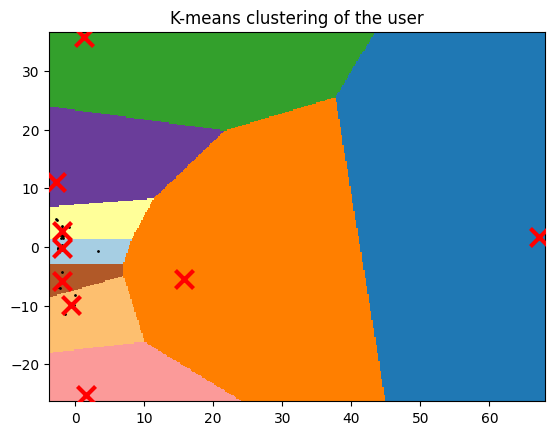

In [48]:
from scipy.sparse import dok_matrix

#d_matrix = dok_matrix(scipy_matrix).todense()



plot(user_ratings=dense_array, k=9)


## 5. How about users?

Can we you use the code above to cluster users depending on their ratings? Can you visualise this clustering using the `plot` function above?

In [4]:
# code goes here

## 6. Saving clusters

Create a dataframe consisting of 'User-ID' and cluster labels and save it in the data directory. To help you do this you can use the following code.

In [97]:
kmeans_3_clusters = KMeans(n_clusters=3)

clusters = kmeans_3_clusters.fit(...)

# code goes here

In [10]:
import time

x = 0

start = time.time()

for i in range(10000000):
    x += 1
    
end = time.time()

print("time elapsed {} milli seconds".format((end-start)))

    

time elapsed 2.068150281906128 milli seconds
